# 정렬 알고리즘
- 정렬(Sorting)이란 데이터를 특정한 기준에 따라 순서대로 나열하는 것
- 일반적으로 문제 상황에 따라서 적절한 정렬 알고리즘이 공식처럼 사용된다.

# 선택 정렬
- 처리되지 않은 데이터 중에서 가장 작은 데이터를 선택해 맨 앞에 있는 데이터와 바꾸는 것을 반복
- 선택 정렬은 N번 만큼 가장 작은 수를 찾아서 맨 앞으로 보내야 한다.
- 구현 방식에 따라서 사소한 오차는 있을 수 있지만, 전체 연산 횟수는 (N^2 + N - 2) / 2로 표현할 수 있는데, O(N^2)이라고 작성한다

In [1]:
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

for i in range(len(array)):
    min_index = i # 가장 작은 원소의 인덱스스
    for j in range(i + 1, len(array)):
        if array[min_index] > array[j]:
            min_index = j
        array[i], array[min_index] = array[min_index], array[i] # 스와프
        
print(array)

[0, 1, 2, 3, 5, 6, 7, 8, 4, 9]


# 삽입 정렬
- 처리되지 않은 데이터를 하나씩 골라 적절한 위치에 삽입한다.
- 구현 난이도 높은 편이나, 일반적으로 더 효율적으로 작동.
- O(N^2), 현재 리스트의 데이터가 거의 정렬되어 있는 상태라면 매우 빠르게 동작, 최선의 경우 O(N)의 시간 복잡도를 가진다.


In [3]:
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

for i in range(1, len(array)):
    for j in range(i, 0, -1): # 인덱스 i부터 1까지 1씩 감소하며 반복하는 문법
        if array[j] < array[j - 1]: # 한 칸씩 왼쪽으로 이동
            array[j], array[j - 1] = array[j - 1], array[j]
        else: # 자기보다 작은 데이터를 만나면 그 위치에서 멈춤
            break
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# 퀵 정렬
- 기준 데이터를 설정하고, 그 기준보다 큰 데이터와 작은 데이터의 위치를 바꾸는 방법
- 일반적인 상황에서 가장 많이 사용되는 정렬 알고리즘 중 하나
- 병합 정렬과 더불어 대부분의 프로그래밍 언어의 정렬 라이브러리의 근간이 되는 알고리즘
- 가장 기본적인 퀵 정렬은 첫 번째 데이터를 기준 데이터(Pivot)로 설정
- 이상적인 경우 분할이 절반씩 일어난다면 전체 연산 횟수로 O(NlogN)를 기대, 최악의 경우 O(N^2)

In [4]:
array = [5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array, start, end):
    if start >= end: # 원소가 1개인 경우 종료
        return
    pivot = start # 피벗은 첫 번째 원소
    left = start + 1
    right = end
    while(left <= right):
        # 피벗보다 큰 데이터를 찾을때까지 반복
        while(left <= end and array[left] <= array[pivot]):
            left += 1
        # 피벗보다 작은 데이터를 찾을 때까지 반복
        while(right > start and array[right] >= array[pivot]):
            right -= 1
        if(left > right): # 엇갈렸다면 작은 데이터와 피벗을 교체
            array[right], array[pivot] = array[pivot], array[right]
        else: # 엇갈리지 않았다면 작은 데이터와 큰 데이터를 교체
            array[left], array[right] = array[right], array[left]
    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬 수행
    quick_sort(array, start, right - 1)
    quick_sort(array, right + 1, end)
    
quick_sort(array, 0, len(array) - 1)

print(array)    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
array = [5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array):
    # 리스트가 하나 이하의 원소만을 담고 있다면 종료
    if len(array) <= 1:
        return array
    pivot = array[0] # 피벗은 첫 번째 원소
    tail = array[1:] # 피벗을 제외한 리스트
    
    left_side = [x for x in tail if x <= pivot] # 분할된 왼쪽 부분
    right_side = [x for x in tail if x > pivot] # 분할된 오른쪽 부분
    
    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬 수행하고, 전체 리스트 반환
    return quick_sort(left_side) + [pivot] + quick_sort(right_side)

print(quick_sort(array))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# 계수 정렬
- 특정한 조건이 부합할 때만 사용할 수 있지만 매우 빠르게 동작하는 정렬 알고리즘.
- 계수 정렬은 데이터의 크기 범위가 제한되어 정수 형태로 표현할 수 있을 때 사용 가능
- 데이터의 개수가 N, 데이터(양수) 중 최대값이 K일 때 최악의 경우에도 수행 시간 O(N+K)를 보장
- 동일한 값을 가지는 데이터가 여러 개 등장할 때 효과적으로 사용
- 성적의 경우 100점을 맞은 학생이 여러 명일 수 있기 때문에 계수 정렬이 효과적

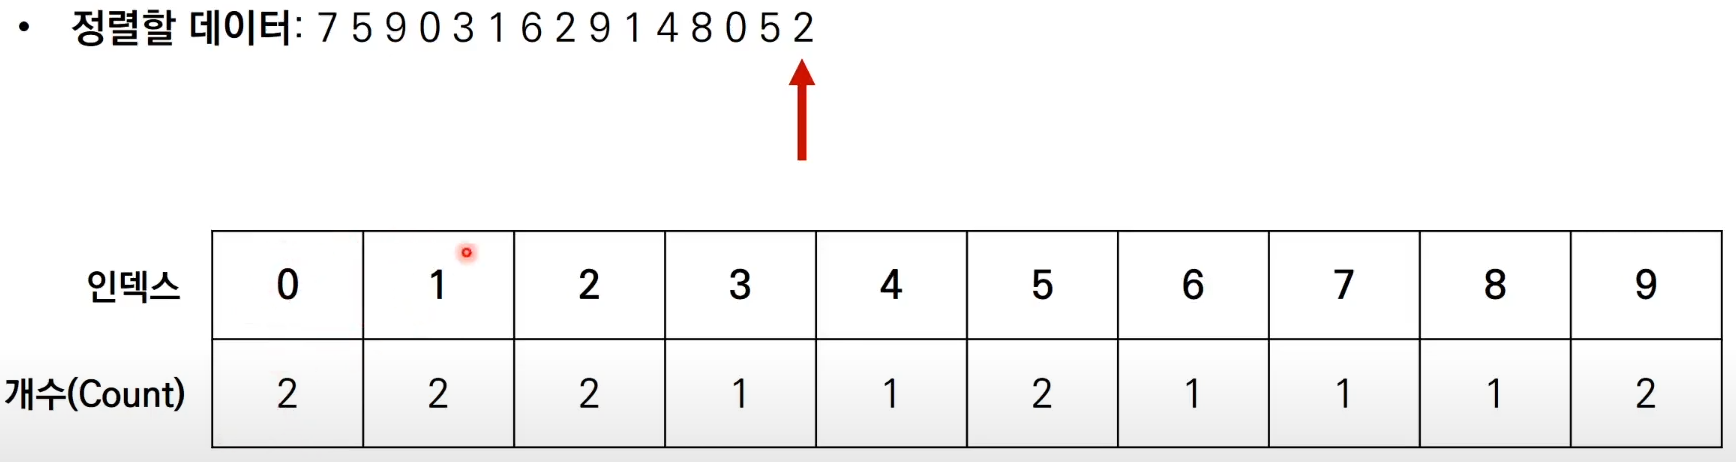

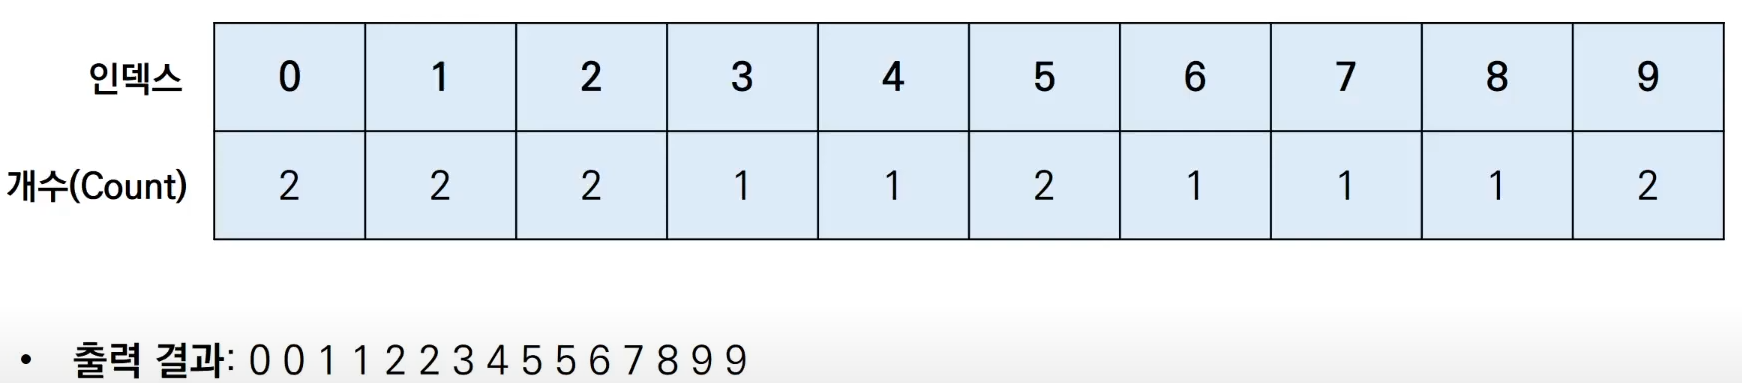

In [6]:
# 모든 원소의 값이 0보다 크거나 같다고 가정
array = [7, 5, 9, 0, 3, 1, 6, 2, 9, 1, 4, 8, 0, 5, 2]
# 모든 범위를 포함하는 리스트 선언(모든 값을 0으로 초기화)
count = [0] * (max(array) + 1)

for i in range(len(array)):
    count[array[i]] += 1 # 각 데이터에 해당하는 인덱스의 값 증가
    
for i in range(len(count)): # 리스트에 기록된 정렬 정보 확인
    for j in range(count[i]):
        print(i, end=' ') # 띄어쓰기를 구분으로 등장한 횟수만큼 인덱스 출력

0 0 1 1 2 2 3 4 5 5 6 7 8 9 9 

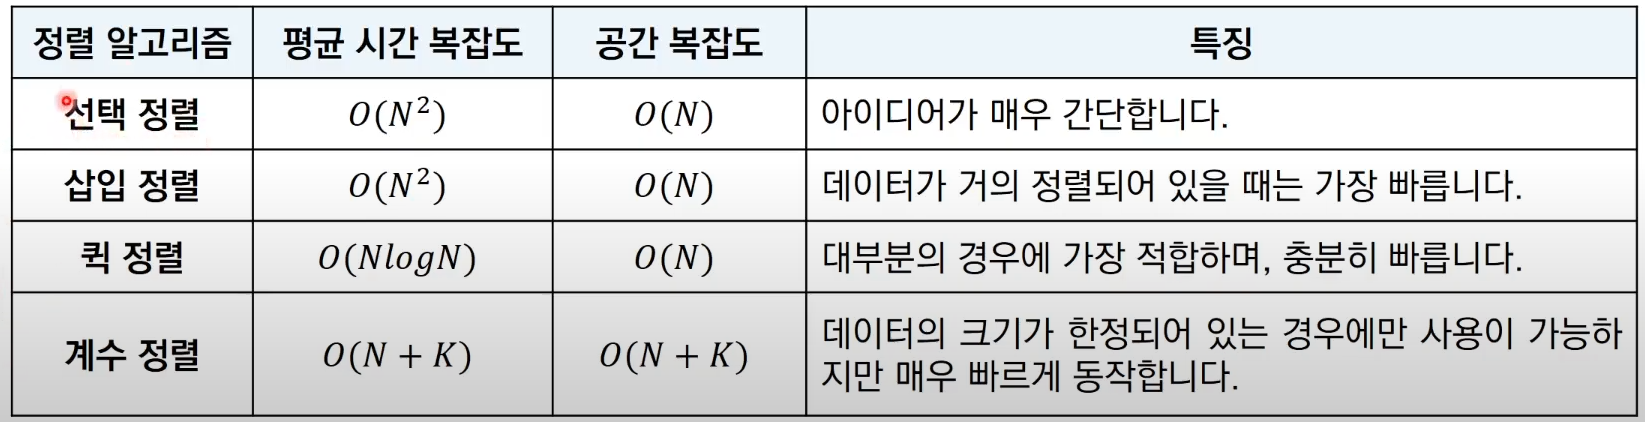

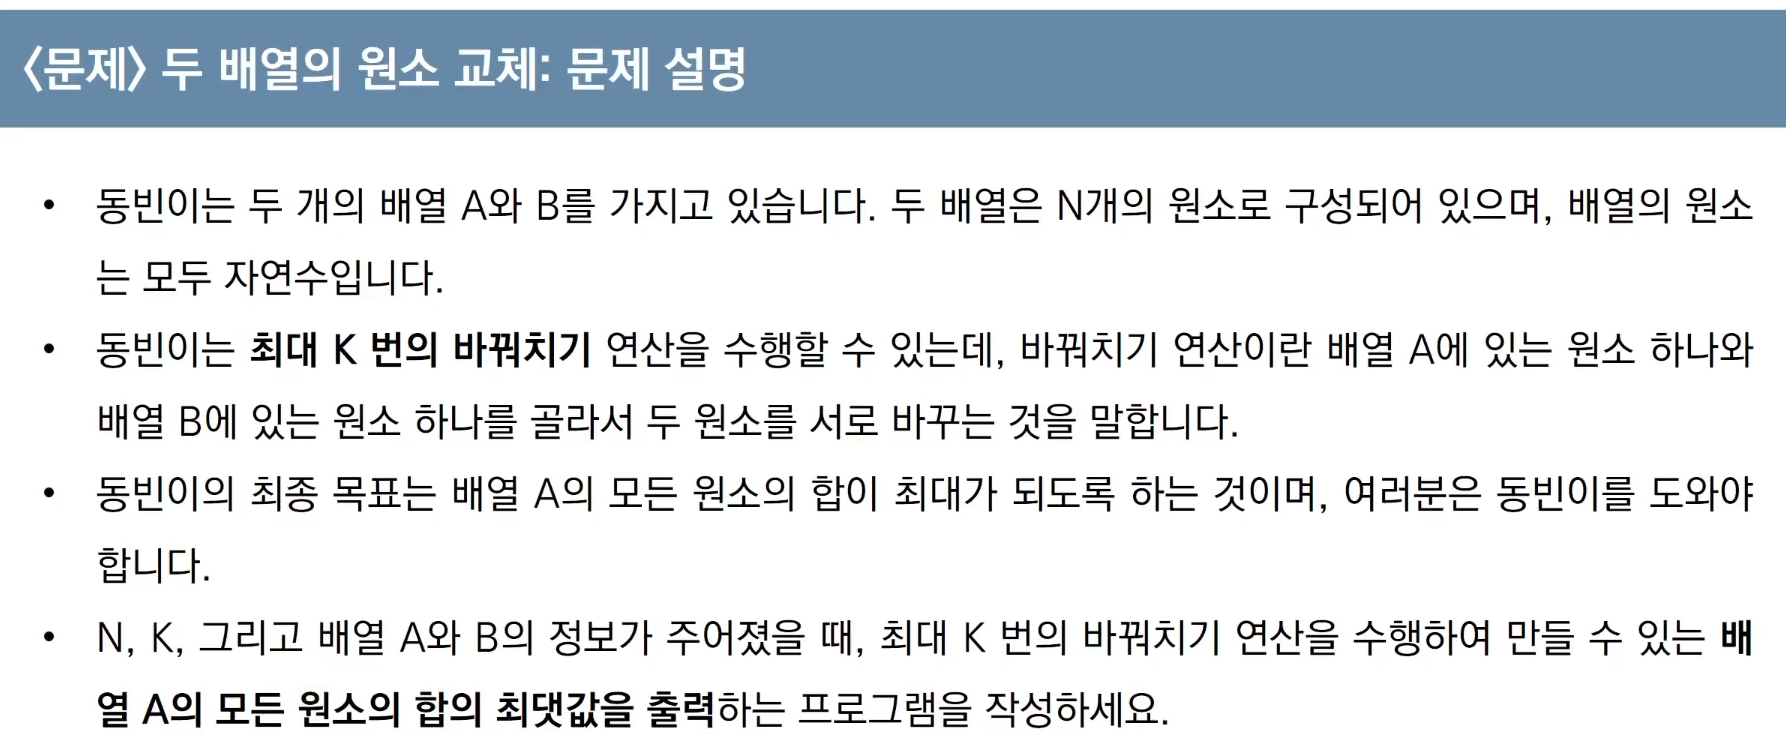

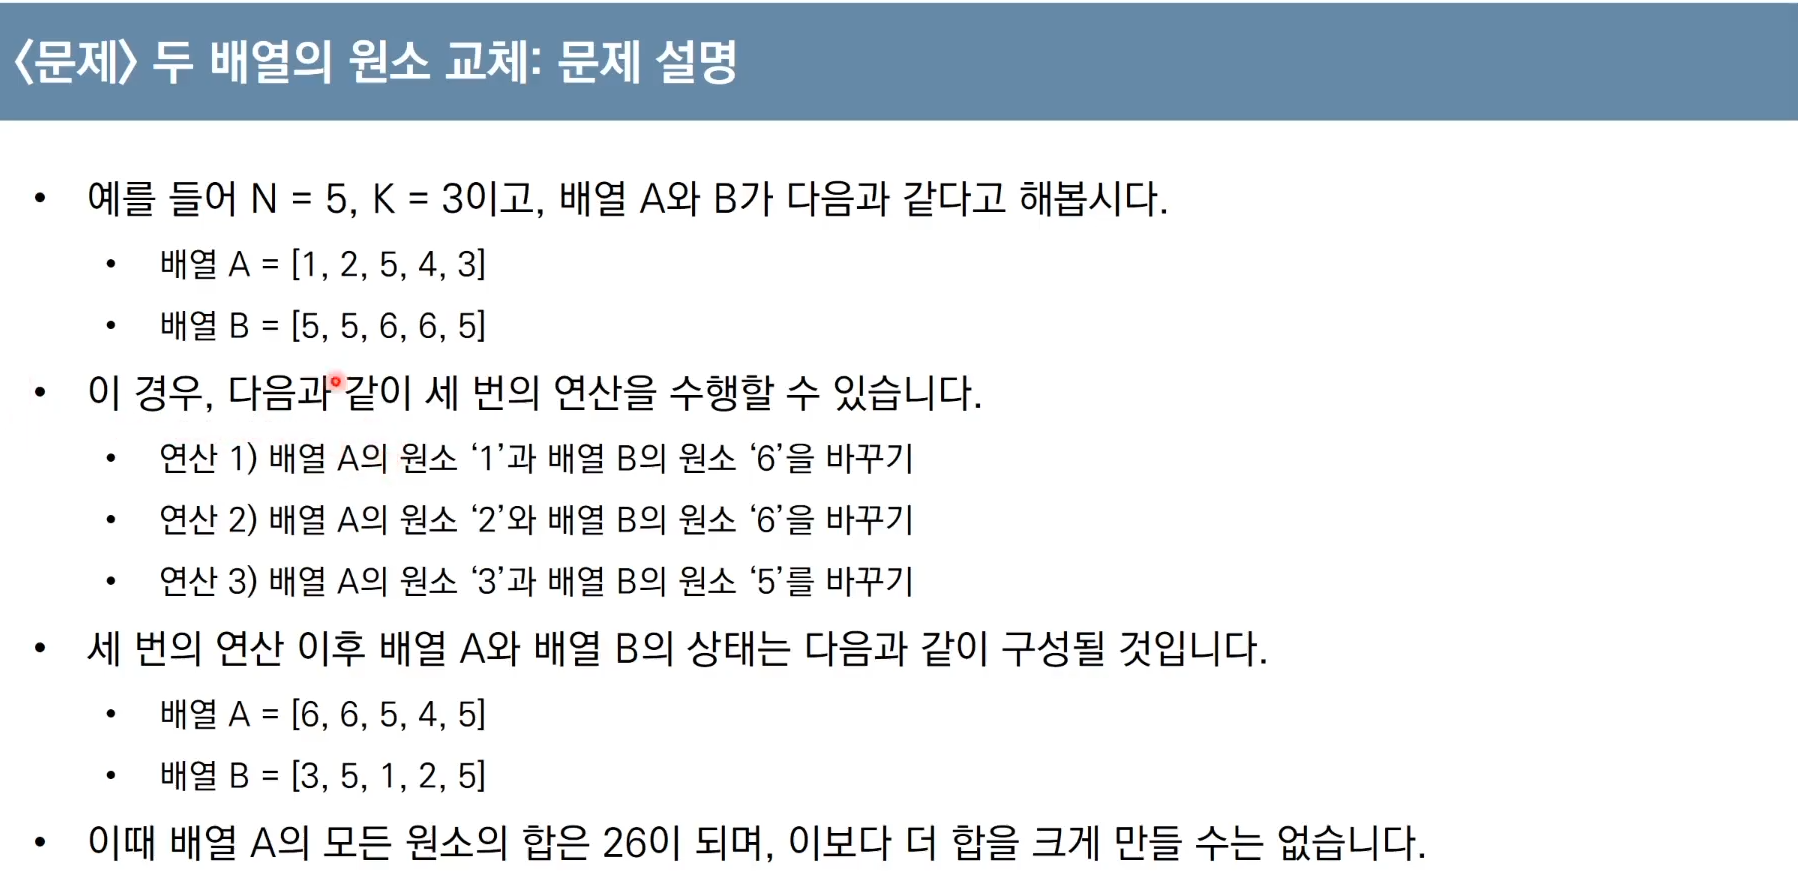

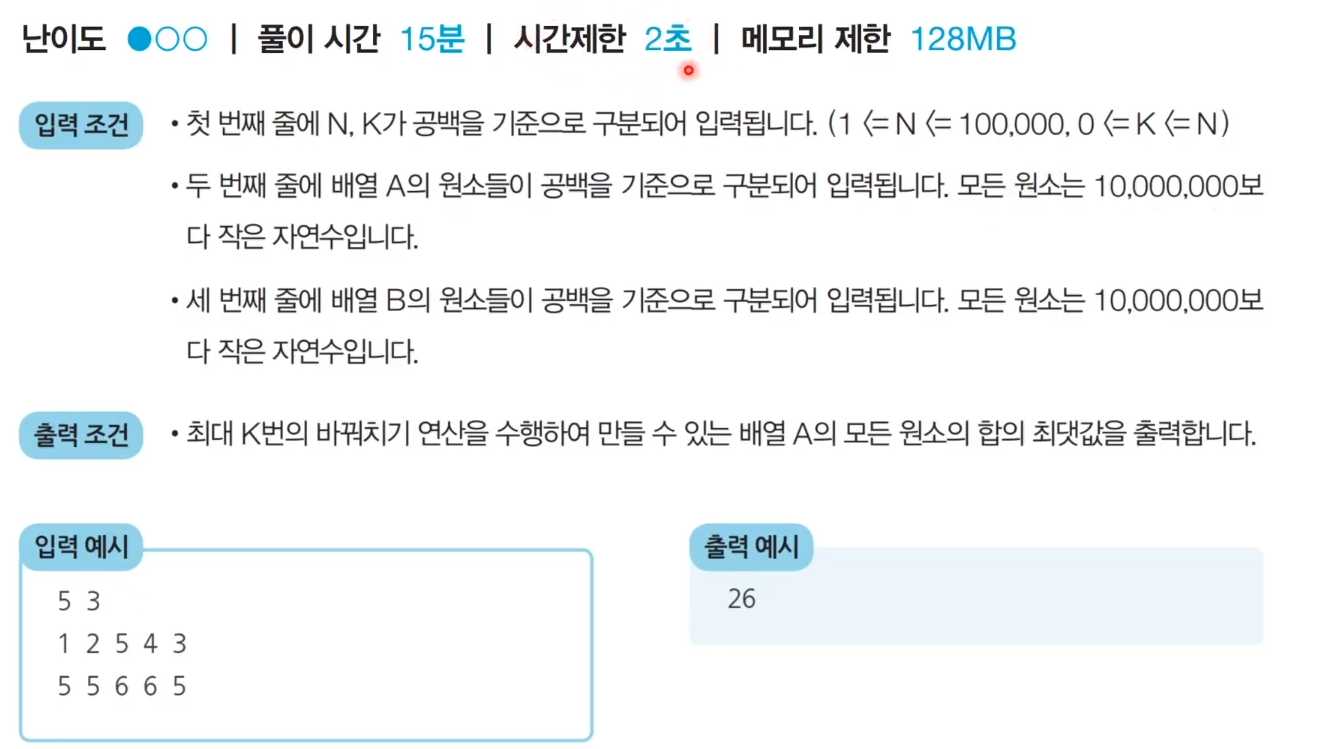

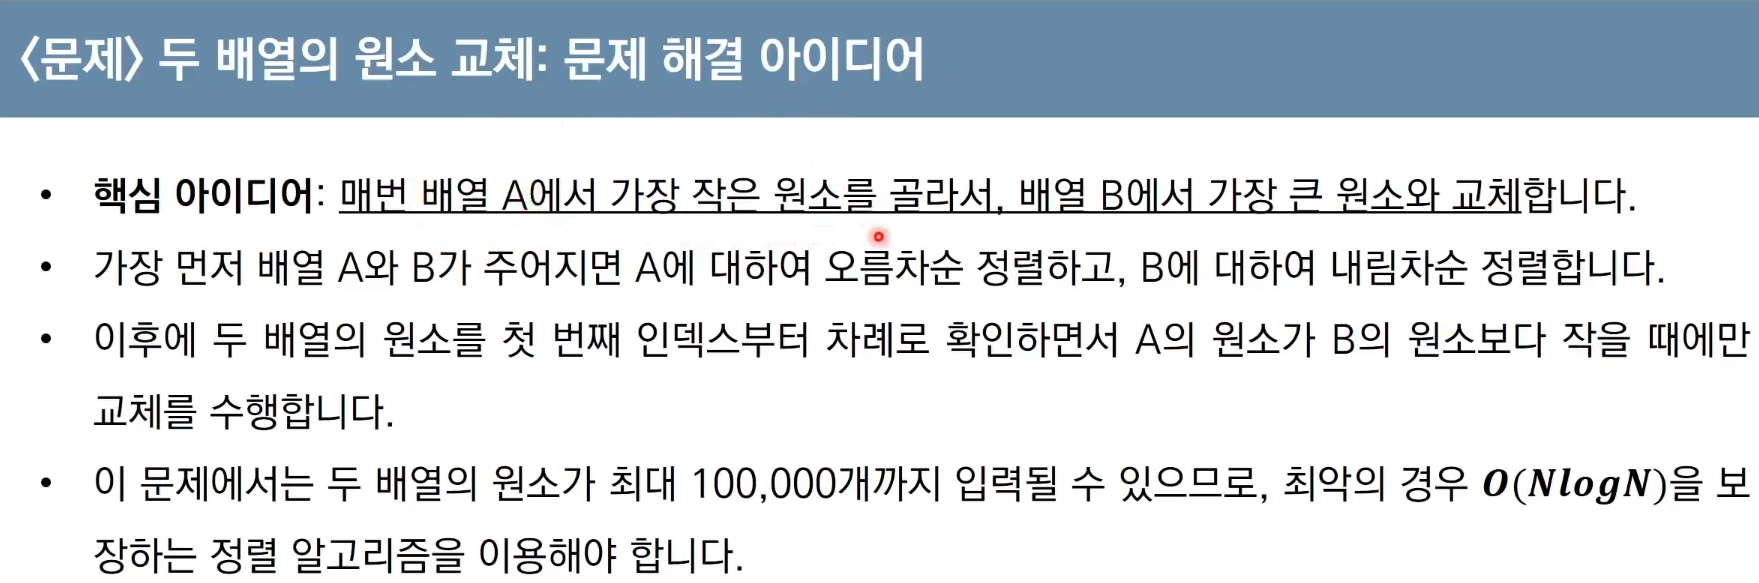

In [7]:
n , k = map(int, input().split()) # N과 K를 입력 받기
a = list(map(int, input().split()))
b = list(map(int, input().split()))

a.sort() # 배열 A는 오름차순 정렬 수행
b.sort(reverse=True) # 배열 B는 내림차순 정렬 수행

# 첫 번째 인덱스부터 확인하며, 두 배열의 원소를 최대 K번 비교
for i in range(k):
    # A의 원소보다 B의 원소가 작은 경우
    if a[i] < b[i]:
        # 두 원소를 교체
        a[i], b[i] = b[i], a[i]
        
    else:
        break
    
print(sum(a))

26
